In [1]:
import pandas as pd
import numpy as np
import matminer
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate
from matminer.figrecipes.plot import PlotlyFig

In [2]:
data = pd.read_csv('ML_capacity.csv')

In [5]:
data = data[data['working_ion']=='Li']

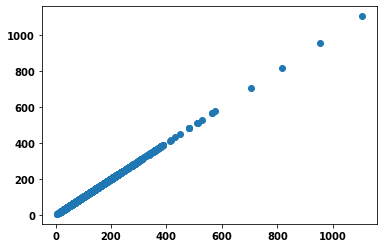

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
y_c = data['capacity_grav'] 
plt.scatter(y_c,y_c)
plt.show()

In [25]:
c= list(data['average_voltage'])
n = 0 
m = 0
p = 0 
q = 0
l = 0
s = 0 
for i in c:
    if i > 10:
        l = l + 1
    elif i >8 and i < 10:
        n = n + 1
    elif i > 6.5 and i < 8:
        m = m + 1
    elif i < -1:
        p = p + 1
    else:
        q = q + 1
print (l, n, m, p, q)

1 1 3 4 2282


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021294FB2C18>]],
      dtype=object)

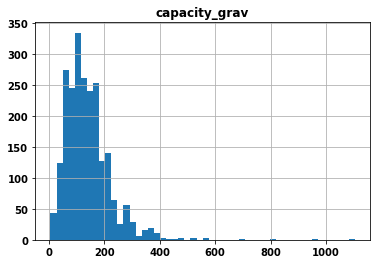

In [7]:
data.hist('capacity_grav',bins=50)

In [15]:
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=10)

In [8]:
x=data['capacity_grav']

In [9]:
X = np.expand_dims(x, axis = 1)

In [10]:
X.shape

(2291, 1)

In [16]:
x_trans = quantile_transformer.fit_transform(X)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,
          4.,   7.,  11.,  17.,  28.,  40.,  57.,  75.,  99., 123., 147.,
        164., 180., 189., 189., 181., 166., 146., 122., 100.,  75.,  55.,
         42.,  30.,  17.,   8.,   7.,   4.,   1.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-5.19933758e+00, -4.99136408e+00, -4.78339058e+00, -4.57541707e+00,
        -4.36744357e+00, -4.15947007e+00, -3.95149656e+00, -3.74352306e+00,
        -3.53554956e+00, -3.32757605e+00, -3.11960255e+00, -2.91162905e+00,
        -2.70365554e+00, -2.49568204e+00, -2.28770854e+00, -2.07973503e+00,
        -1.87176153e+00, -1.66378803e+00, -1.45581452e+00, -1.24784102e+00,
        -1.03986752e+00, -8.31894013e-01, -6.23920510e-01, -4.15947007e-01,
        -2.07973503e-01,  4.89217555e-11,  2.07973503e-01,  4.15947007e-01,
         6.23920510e-01,  8.31894013e-01,  1.03986752e+00,  1.24784102e+00,
         1.45581452e+00,  1.66378803e+00,  1.87176

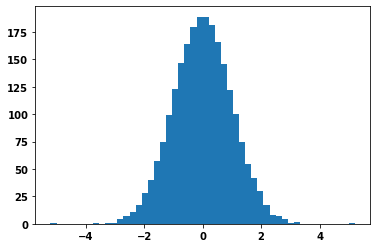

In [17]:
plt.hist(x_trans,bins=50)

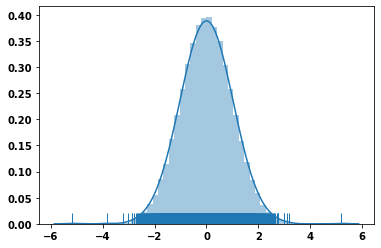

In [21]:
import seaborn as sns
sns.distplot(x_trans, rug=True )

In [22]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)

In [23]:
x_pt_trans = pt.fit_transform(X)

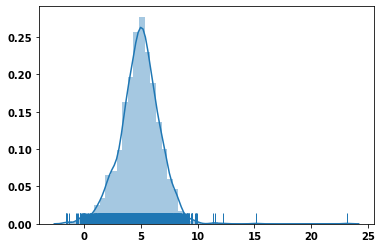

In [24]:
import seaborn as sns
sns.distplot(x_pt_trans, rug=True )

In [28]:
import torchvision

In [30]:
torchvision.transforms.Normalize(0, 1, inplace=False)

TypeError: __init__() missing 1 required positional argument: 'std'

In [18]:
import numpy as np
import torch
x_torch = torch.tensor(x.values)

In [19]:
type(x_torch)

torch.Tensor

In [20]:
means = torch.mean(x_torch)

In [21]:
stds = torch.std(x_torch)

In [25]:
means

tensor(139.3726, dtype=torch.float64)

In [22]:
x_trans_scale = (x_torch-means)/stds

(array([ 43., 125., 275., 246., 335., 261., 241., 253., 127., 140.,  64.,
         26.,  56.,  29.,   6.,  16.,  19.,  11.,   3.,   1.,   1.,   3.,
          0.,   3.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.61361864, -1.34845271, -1.08328677, -0.81812083, -0.55295489,
        -0.28778895, -0.02262301,  0.24254293,  0.50770887,  0.77287481,
         1.03804075,  1.30320669,  1.56837263,  1.83353857,  2.09870451,
         2.36387045,  2.62903639,  2.89420233,  3.15936827,  3.42453421,
         3.68970015,  3.95486609,  4.22003203,  4.48519796,  4.7503639 ,
         5.01552984,  5.28069578,  5.54586172,  5.81102766,  6.0761936 ,
         6.34135954,  6.60652548,  6.87169142,  7.13685736,  7.4020233 ,
         7.66718924,  7.93235518,  8.19752112,  8.46268706,  8.727853  ,
         8.99301894,  9.25818488,  9.52335082,  9.78851676, 10.0536827 ,
 

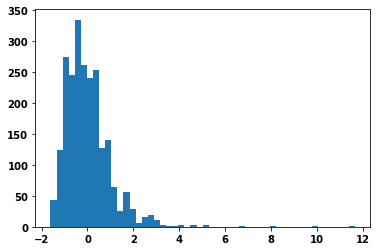

In [23]:
plt.hist(x_trans_scale,bins=50)

In [103]:
from sklearn.preprocessing import StandardScaler

In [109]:
x_trans_L2 = x_torch/torch.sum(x_torch**2)

(array([  3.,   1.,   0.,   0.,   3.,   4.,   9.,   5.,   8.,   7.,  20.,
         29.,  45.,  64.,  72.,  96., 160., 211., 254., 287., 297., 219.,
        172., 133.,  88.,  53.,  28.,  10.,   7.,   1.,   0.,   2.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-6.59274428e-05, -5.65437293e-05, -4.71600158e-05, -3.77763024e-05,
        -2.83925889e-05, -1.90088755e-05, -9.62516201e-06, -2.41448556e-07,
         9.14226490e-06,  1.85259784e-05,  2.79096918e-05,  3.72934053e-05,
         4.66771187e-05,  5.60608322e-05,  6.54445456e-05,  7.48282591e-05,
         8.42119726e-05,  9.35956860e-05,  1.02979399e-04,  1.12363113e-04,
         1.21746826e-04,  1.31130540e-04,  1.40514253e-04,  1.49897967e-04,
         1.59281680e-04,  1.68665394e-04,  1.78049107e-04,  1.87432821e-04,
         1.96816534e-04,  2.06200247e-04,  2.15583961e-04,  2.24967674e-04,
         2.34351388e-04,  2.43735101e-04,  2.53118

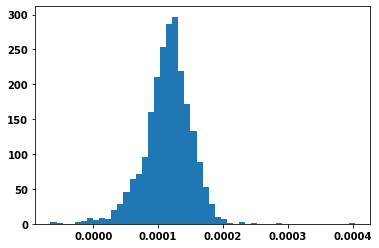

In [110]:
plt.hist(x_trans_L2,bins=50)

In [111]:
type(x_trans_L2)

torch.Tensor

In [114]:
x_torch.duplicated()

AttributeError: 'Tensor' object has no attribute 'duplicated'